In [41]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from math import sqrt

from matplotlib import pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Acquire df

In [2]:
df = pd.read_csv('advertising.csv', index_col=0)

# Summarize df

In [3]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### ne().idxmax()

- subset df to begin after any 0 values in the radio column

In [6]:
df.loc[df['radio'].ne(0).idxmax()]

TV           230.1
radio         37.8
newspaper     69.2
sales         22.1
Name: 1, dtype: float64

In [7]:
df.loc[df['radio'].ne(0).idxmax():]

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


## Investigate the 0 Min in radio column

In [8]:
df[df.radio == 0]

,TV,radio,newspaper,sales
128,80.2,0.0,9.2,8.8


### nsmallest() and nlargest()

In [9]:
print(df.nsmallest(3, 'radio'))
print(df.nlargest(3, 'radio'))

       TV  radio  newspaper  sales
128  80.2    0.0        9.2    8.8
108  90.4    0.3       23.2    8.7
109  13.1    0.4       25.6    5.3
       TV  radio  newspaper  sales
59  210.8   49.6       37.7   23.8
38   74.7   49.4       45.7   14.7
56  198.9   49.4       60.0   23.7


# Create OLS model

- Create model using formula y ~ X where X is the predictor var and y is the output var.

- I will investigate the relationship between tv advertising spending and units sold.

In [10]:
ols_model = smf.ols('sales ~ TV', data=df)

## Fit the OLS Model

In [12]:
ols_model = ols_model.fit()

## Call model's parameters
- sales = 7.032 + 0.047 * TV

- a = 7.032 and b = 0.047

In [13]:
ols_model.params

Intercept    7.032594
TV           0.047537
dtype: float64

## Make Sales Predictions Using Equation


In [14]:
sales_pred = ols_model.predict()

## Evaluate OLS Model

In [20]:
r2 = ols_model.rsquared
print(f'The R-squared score of the ols_model is {round(r2,3)}')
print(f'Money spent on TV Ads explains {round(r2*100,1)}% of the variance in sales.')

The R-squared score of the ols_model is 0.612
Money spent on TV Ads explains 61.2% of the variance in sales.


In [19]:
f_pval = ols_model.f_pvalue
print(f'The p-value for the ols_model is {round(f_pval, 4)}')

The p-value for the ols_model is 0.0


In [21]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 12 Feb 2020   Prob (F-statistic):           1.47e-42
Time:                        21:34:00   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Visualize 

- sales_pred against our TV advertising costs to find line of best fit

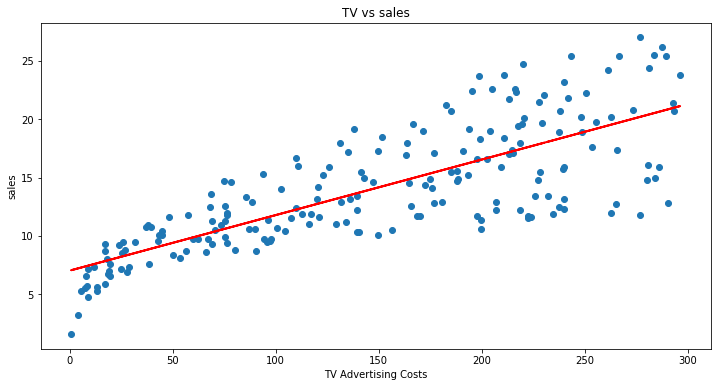

In [23]:
plt.figure(figsize=(12, 6))

plt.plot(df['TV'], df['sales'], 'o')           # scatter plot showing actual data
plt.plot(df['TV'], sales_pred, 'r', linewidth=2)   # regression line

plt.xlabel('TV Advertising Costs')
plt.ylabel('sales')
plt.title('TV vs sales')
plt.show()

## Predict for a specific X Value

- With TV advertising costs at $300, our units sold is predicted to be 21.

In [24]:
new_X = 300
model.predict({'TV': new_X})

0    21.293586
dtype: float64

# Create Multiple Linear Regression Model

- Use the TV and radio variables to predict the number of units sold.

- a = intercept, $B_1$ = TV coefficient, $B_2$ = radio coefficient

## Create Model

In [23]:
lm = LinearRegression()

## Split Data into X and y

- X = predictors

- y = output

In [24]:
predictors = ['TV', 'radio']
X = df[predictors]

y = df['sales']

In [25]:
X.head(1)

,TV,radio
1,230.1,37.8


In [26]:
y.head(1)

1    22.1
Name: sales, dtype: float64

## Fit model

In [27]:
model = lm.fit(X, y)

## Call coefficients and intercept

In [28]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 2.9210999124051362
betas = [0.04575482 0.18799423]


## Predict Sales

In [29]:
yhat = model.predict(X)

## Predict Using Specific Values for TV and radio

- If I predict spending 400 on TV ads and 200 on radio ads, the model predicts that I will see 58 units.

In [30]:
new_X = [[400, 200]]
print(model.predict(new_X))

[58.82187128]


# Evaluate Models

In [31]:
MSE = mean_squared_error(df.sales, yhat)

In [32]:
print(f'Linear Regression Model MSE = {MSE}')

Linear Regression Model MSE = 2.784569900338092


In [33]:
print(f'Linear Regression Model RMSE = {round(sqrt(MSE),2)} units.')

Linear Regression Model RMSE = 1.67 units.


# Feature Selection

- TV has the highest correlation with Sales

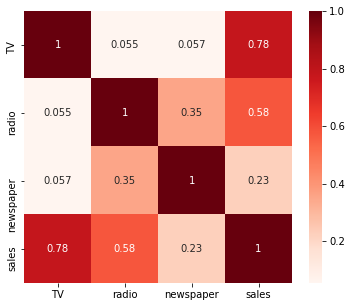

In [37]:
plt.figure(figsize=(6, 5))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [38]:
# filter correlations to those about 50%
cor_target = abs(cor['sales'])
relevant_features = cor_target[cor_target > .5]
relevant_features

TV       0.782224
radio    0.576223
sales    1.000000
Name: sales, dtype: float64

In [39]:
X = df[['TV', 'radio', 'newspaper']]
y = df[['sales']]

In [42]:
# Use Select K Best
from sklearn.feature_selection import SelectKBest, f_regression

f_selector = SelectKBest(f_regression, k=2)
f_selector.fit(X, y)
f_support = f_selector.get_support()
f_feature = X.loc[:, f_support].columns.tolist()

print(str(len(f_feature)), 'selected_features')
print(f_feature)

2 selected_features
['TV', 'radio']
